In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from andi_datasets.models_phenom import models_phenom

L = 200; T = 1000
Ns = [20,10,10]
alphas = [1,1.5]
D = 1   
trajs, labels = [], []
for ns, alpha in zip(Ns, alphas):
    ts, ls = models_phenom().single_state(N = ns,
                                        L = L,
                                        T = T, 
                                        alphas = alpha,
                                        Ds = D)
    trajs.append(ts)
    labels.append(ls)
    
trajs = np.concatenate(trajs, axis = 1)
labels = np.concatenate(labels, axis = 1)

In [101]:
Nc = 15; r = 1; L = 20
Ds = [[1,0], [1,0.1]]
r , L, Nc = (10, 256, 60)
comp_center = models_phenom._distribute_circular_compartments(Nc = Nc, r = r, L = L)
trajs, labels = models_phenom().confinement(N = 100, T = 150, L = L, comp_center = comp_center, trans = 0.2, Ds = Ds, r = r)

In [102]:
from andi_datasets.utils_trajectories import inside_fov_dataset
fov_origin = [20,20]; fov_length = L*0.5
trajs_fov, labels_fov = inside_fov_dataset(trajs, labels, fov_origin, fov_length)

c:\users\gorka\github\andi_datasets\andi_datasets\utils_trajectories.py:279: RuntimeWarning: All-NaN slice encountered
  merge_dims = np.nanmin(np.vstack((x, y)), axis = 0)


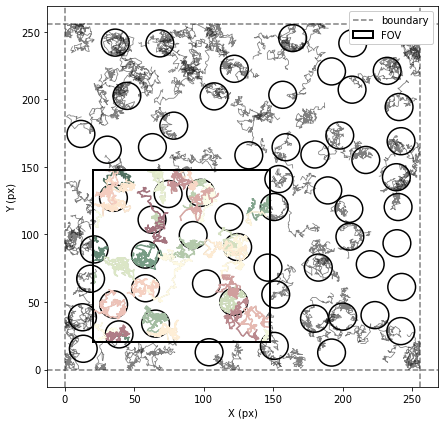

In [103]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

fig, ax = plt.subplots(figsize = (7,7))

colors = plt.cm.RdYlGn(np.linspace(0, 1, len(trajs_fov)))


for idx, og_traj in enumerate(trajs[:, :, :].transpose(1,0,2)):
    ax.plot(og_traj[:, 0], og_traj[:, 1], c = 'k', alpha = 0.5, lw = 0.8, zorder = -2)

for t, c in zip(trajs_fov, colors[::-1, :]):
    c = matplotlib.colors.rgb_to_hsv(c[:-1])
    c[1] *= 0.3
    c = matplotlib.colors.hsv_to_rgb(c)
    ax.plot(t[0], t[1], c= c)
    
for c in comp_center:
        circle = plt.Circle((c[0], c[1]), r, lw = 1.5, facecolor = 'None', edgecolor = 'k')
        ax.add_patch(circle) 


# FOV
fov_min_x, fov_min_y = fov_origin
fov_max_x, fov_max_y = np.array(fov_origin)+fov_length
currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((fov_min_x, fov_min_y), fov_length, fov_length, fill=None, alpha=1, lw = 2, label = 'FOV', zorder = 10))

# plt.plot([fov_])
# ax.axhline(fov_min_x,  c = 'k', label = 'FOV')
# ax.axhline(fov_min_y,  c = 'k')
# ax.axvline(fov_min_x,  c = 'k')
# ax.axvline(fov_min_y,  c = 'k')

# Boundary
ax.axhline(0,  alpha = 0.5, ls = '--', c = 'k', label = 'boundary')
ax.axhline(L,  alpha = 0.5, ls = '--', c = 'k')
ax.axvline(0,  alpha = 0.5, ls = '--', c = 'k')
ax.axvline(L,  alpha = 0.5, ls = '--', c = 'k')

legend = ax.legend()
legend.get_frame().set_alpha(None)
plt.setp(ax, xlabel = 'X (px)', ylabel = 'Y (px)')

fig.savefig('experiment.svg')

In [74]:
import matplotlib
matplotlib.colors.rgb_to_hsv(colors[:,:-1])

array([[9.61616162e-01, 1.00000000e+00, 6.47058824e-01],
       [9.70993875e-01, 9.46158160e-01, 6.85505575e-01],
       [9.80327223e-01, 8.98035050e-01, 7.23952326e-01],
       [9.91469120e-01, 8.46630055e-01, 7.70088428e-01],
       [7.02987698e-04, 8.11697575e-01, 8.08535179e-01],
       [1.03575008e-02, 8.12432139e-01, 8.49826990e-01],
       [1.64645678e-02, 7.92540998e-01, 8.72126105e-01],
       [2.37751361e-02, 7.69974337e-01, 8.98885044e-01],
       [2.98524026e-02, 7.52170284e-01, 9.21184160e-01],
       [3.71273412e-02, 7.31911097e-01, 9.47943099e-01],
       [4.40399955e-02, 7.12193951e-01, 9.61014994e-01],
       [5.18160549e-02, 6.90419447e-01, 9.67935409e-01],
       [6.16581743e-02, 6.64697543e-01, 9.76239908e-01],
       [7.03204116e-02, 6.43594557e-01, 9.83160323e-01],
       [8.13171201e-02, 6.18659842e-01, 9.91464821e-01],
       [8.78476341e-02, 5.87592937e-01, 9.92848904e-01],
       [9.61945032e-02, 5.48978644e-01, 9.93771626e-01],
       [1.04088756e-01, 5.16854

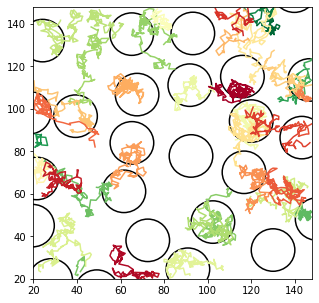

In [89]:
fig, ax = plt.subplots(figsize = (5,5))
for t, l, c in zip(trajs_fov, labels_fov, colors[::-1, :]):
#     ax.scatter(t[0], t[1], c= plt.cm.RdYlGn(l[-1]-1), s = 2, alpha = 0.7)
    c = matplotlib.colors.rgb_to_hsv(c[:-1])
    c[1] *= 1
    c = matplotlib.colors.hsv_to_rgb(c)
    ax.plot(t[0], t[1], c = c, zorder = -1, alpha = 1)
for c in comp_center:
        circle = plt.Circle((c[0], c[1]), r, lw = 1.5, facecolor = 'None', edgecolor = 'k', zorder = -2)
        ax.add_patch(circle) 
plt.setp(ax, 
         xlim = (fov_origin[0], fov_origin[0]+fov_length),
         ylim = (fov_origin[0], fov_origin[0]+fov_length))

fig.savefig('fov.svg')

In [90]:
from andi_datasets.utils_challenge import continuous_label_to_list

In [96]:
labels_fov[13].shape

(3, 150)

In [97]:
continuous_label_to_list(labels_fov[13].transpose())

(array([  6,  15,  28,  30,  33,  36,  38,  50,  60,  63,  64, 120],
       dtype=int64),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1.        , 0.92003139, 1.        , 0.92003139, 1.        ,
        0.92003139, 1.        , 0.92003139, 1.        , 0.92003139,
        1.        , 0.92003139, 1.        ]),
 array([2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2.]))

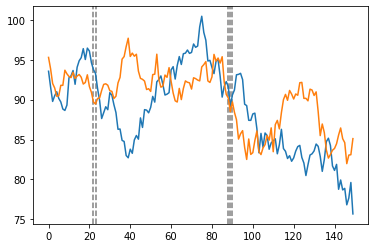

In [112]:
idx = 11
plt.plot(trajs_fov[idx][0])
plt.plot(trajs_fov[idx][1])

lab = labels_fov[idx][-1]
for line in np.argwhere(lab[1:] != lab[:-1]):
    plt.axvline(line, zorder = -1, c = 'k', alpha = 0.5, ls = '--')
    
plt.savefig('trajectory.svg')

In [105]:
lab

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

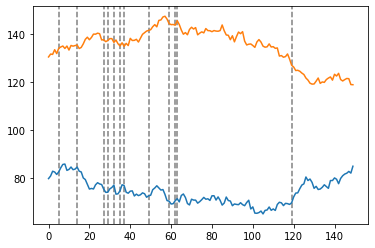

In [94]:
idx = 13
plt.plot(trajs_fov[idx][0])
plt.plot(trajs_fov[idx][1])

lab = labels_fov[idx][-1]
for line in np.argwhere(lab[1:] != lab[:-1]):
    plt.axvline(line, zorder = -1, c = 'k', alpha = 0.5, ls = '--')

In [ ]:
np.arg